In [1]:
import pandas as pd
import numpy as np
pitching_stats = r"C:\Users\sanja\OneDrive\Desktop\pitcher_stats.xlsx"

stats = pd.read_excel(pitching_stats)

stats.head(6)


,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Logan Webb,SF,27,33,33,2,1,216.0,201,78,194,31,20,11,13,0,0,0,3.25,1.07
1,Zac Gallen,ARI,28,34,34,1,1,210.0,188,81,220,47,22,17,9,0,0,0,3.47,1.12
2,Gerrit Cole,NYY,33,33,33,2,2,209.0,157,61,222,48,20,15,4,0,0,0,2.63,0.98
3,Miles Mikolas,STL,35,35,35,0,0,201.1,226,107,137,39,26,9,13,0,0,0,4.78,1.32
4,Chris Bassitt,TOR,35,33,33,1,1,200.0,176,80,186,59,28,16,8,0,0,0,3.60,1.18
5,Framber Valdez,HOU,30,31,31,2,2,198.0,166,76,200,57,19,12,11,0,0,0,3.45,1.13


In [3]:
# I want to add two more columns (variables) to track, K/BB Ratio (walk to strike-out Ratio) as well 
# as FIP (an advanced pitching metric)

# Adding the K/BB Column
stats['K/BB'] = stats.apply(lambda row: row['K'] / row['BB'] if row['BB'] > 0 else None, axis=1)
# Adding the FIP Column
constant = 3.2
stats['FIP'] = ((13 * stats['HR'] + 3 * (stats['BB']) - 2 * stats['K']) / stats['IP']) + constant

# Display the first few rows to verify the new FIP column
stats.head()

# Display the first few rows to verify the new column added successfully 
stats.head()


,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,...,HR,W,L,SV,BS,HLD,ERA,WHIP,K/BB,FIP
0,Logan Webb,SF,27,33,33,2,1,216.0,201,78,...,20,11,13,0,0,0,3.25,1.07,6.258065,3.037963
1,Zac Gallen,ARI,28,34,34,1,1,210.0,188,81,...,22,17,9,0,0,0,3.47,1.12,4.680851,3.138095
2,Gerrit Cole,NYY,33,33,33,2,2,209.0,157,61,...,20,15,4,0,0,0,2.63,0.98,4.625000,3.008612
3,Miles Mikolas,STL,35,35,35,0,0,201.1,226,107,...,26,9,13,0,0,0,4.78,1.32,3.512821,4.100050
4,Chris Bassitt,TOR,35,33,33,1,1,200.0,176,80,...,28,16,8,0,0,0,3.60,1.18,3.152542,4.045000


In [4]:
# Let's do some data cleaning

# Check for missing values
missing_values = stats.isnull().sum()

stats.fillna(stats.median(), inplace=True)

print(missing_values)
print(stats.fillna)
# Looks like there is no missing values which is good, we can proceed


Player     0
Team       0
Age        0
G          0
GS         0
CG         0
SHO        0
IP         0
H          0
ER         0
K          0
BB         0
HR         0
W          0
L          0
SV         0
BS         0
HLD        0
ERA        0
WHIP       0
K/BB      23
FIP        0
dtype: int64
<bound method DataFrame.fillna of                 Player Team  Age   G  GS  CG  SHO     IP    H   ER  ...  HR  \
0           Logan Webb   SF   27  33  33   2    1  216.0  201   78  ...  20   
1           Zac Gallen  ARI   28  34  34   1    1  210.0  188   81  ...  22   
2          Gerrit Cole  NYY   33  33  33   2    2  209.0  157   61  ...  20   
3        Miles Mikolas  STL   35  35  35   0    0  201.1  226  107  ...  26   
4        Chris Bassitt  TOR   35  33  33   1    1  200.0  176   80  ...  28   
..                 ...  ...  ...  ..  ..  ..  ...    ...  ...  ...  ...  ..   
899       Taylor Hearn  ATL   29   1   0   0    0    0.1    2    4  ...   1   
900       Hector Perez   TB   27   

C:\Users\sanja\AppData\Local\Temp\ipykernel_3052\2127640938.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.fillna(stats.median(), inplace=True)


In [5]:
# Perform a correlation analysis between features and the target variables (FIP and ERA)
correlation_matrix = stats.drop(['Player', 'Team'], axis=1).corr()

# Extract and sort the correlations relative to FIP and ERA
correlation_with_fip = correlation_matrix['FIP'].sort_values(ascending=False)
correlation_with_era = correlation_matrix['ERA'].sort_values(ascending=False)

correlation_with_fip, correlation_with_era


(FIP     1.000000
 ERA     0.828249
 WHIP    0.803309
 Age    -0.018378
 CG     -0.024533
 SHO    -0.025588
 SV     -0.060468
 GS     -0.068755
 HR     -0.071303
 BS     -0.089158
 ER     -0.091156
 HLD    -0.094114
 L      -0.101877
 BB     -0.111675
 H      -0.113414
 W      -0.120516
 IP     -0.131030
 K      -0.138420
 G      -0.164364
 K/BB   -0.216209
 Name: FIP, dtype: float64,
 ERA     1.000000
 WHIP    0.836291
 FIP     0.828249
 Age    -0.034263
 CG     -0.034403
 SHO    -0.037695
 ER     -0.082363
 SV     -0.088472
 GS     -0.088966
 HR     -0.097214
 BS     -0.114931
 L      -0.117704
 H      -0.132958
 HLD    -0.135031
 BB     -0.146403
 W      -0.170949
 IP     -0.173954
 K      -0.180683
 G      -0.219074
 K/BB   -0.255725
 Name: ERA, dtype: float64)

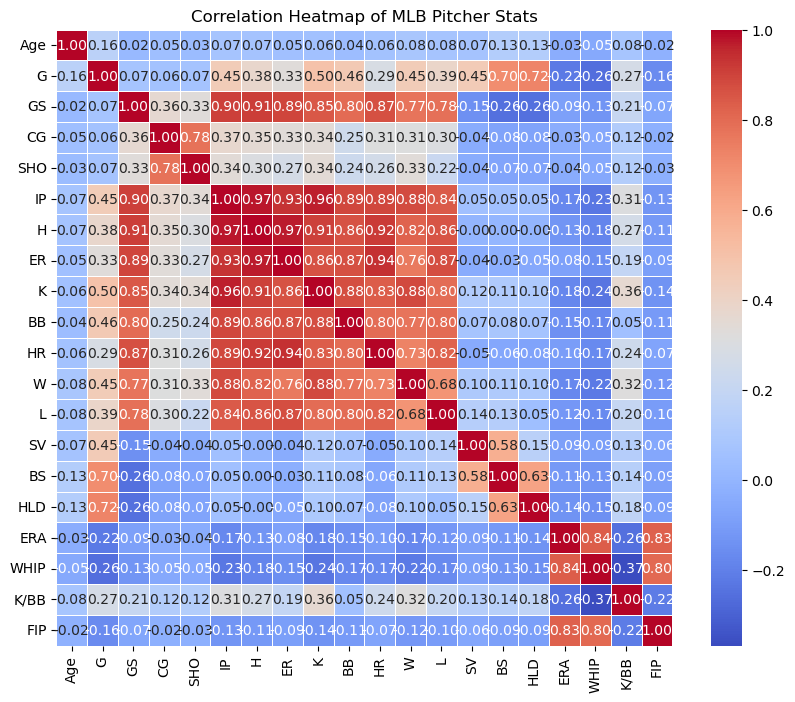

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = stats.drop(['Player', 'Team'], axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8)) # Size is adjustable based on your preference
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Heatmap of MLB Pitcher Stats')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stats[['IP', 'H', 'ER', 'K', 'BB', 'HR']], stats['ERA'], test_size=0.3, random_state=42)

# Training the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 106.22597776196051
R^2 Score: 0.04579701194597452


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Adding X_FIP
X_fip = stats[['IP', 'H', 'ER', 'K', 'BB', 'HR']]

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")


Random Forest Mean Squared Error: 42.87860352632353
Random Forest R^2 Score: 0.6148315838514842


In [9]:
# Now let's predict FIP for 2024 using the Random Forest model
predicted_fip_2024 = random_forest_model.predict(X_fip)  # Adjusted to use the correct variable name

# Next I'm going to add the predicted FIP values to the DataFrame
stats['2024 Predicted FIP'] = predicted_fip_2024

# Verifying the new column is added
print(stats[['Player', '2024 Predicted FIP']].head())

stats.head(10)


          Player  2024 Predicted FIP
0     Logan Webb              3.3938
1     Zac Gallen              3.6651
2    Gerrit Cole              3.2646
3  Miles Mikolas              4.8416
4  Chris Bassitt              3.6494


,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,...,W,L,SV,BS,HLD,ERA,WHIP,K/BB,FIP,2024 Predicted FIP
0,Logan Webb,SF,27,33,33,2,1,216.0,201,78,...,11,13,0,0,0,3.25,1.07,6.258065,3.037963,3.3938
1,Zac Gallen,ARI,28,34,34,1,1,210.0,188,81,...,17,9,0,0,0,3.47,1.12,4.680851,3.138095,3.6651
2,Gerrit Cole,NYY,33,33,33,2,2,209.0,157,61,...,15,4,0,0,0,2.63,0.98,4.625000,3.008612,3.2646
3,Miles Mikolas,STL,35,35,35,0,0,201.1,226,107,...,9,13,0,0,0,4.78,1.32,3.512821,4.100050,4.8416
4,Chris Bassitt,TOR,35,33,33,1,1,200.0,176,80,...,16,8,0,0,0,3.60,1.18,3.152542,4.045000,3.6494
5,Framber Valdez,HOU,30,31,31,2,2,198.0,166,76,...,12,11,0,0,0,3.45,1.13,3.508772,3.290909,3.4668
6,Luis Castillo,SEA,31,33,33,0,0,197.0,160,73,...,14,9,0,0,0,3.34,1.10,3.910714,3.677157,3.4778
7,Mitch Keller,PIT,27,32,32,1,1,194.1,187,91,...,13,9,0,0,0,4.21,1.25,3.818182,3.560639,4.3091
8,Pablo Lopez,MIN,28,32,32,1,1,194.0,176,79,...,11,8,0,0,0,3.66,1.15,4.875000,3.138144,3.6544
9,Corbin Burnes,MIL,29,32,32,0,0,193.2,141,73,...,10,8,0,0,0,3.39,1.07,3.030303,3.634783,3.4792


In [10]:
# I want to see how Clayton Kershaw's FIP will be like in '24
clayton_kershaw_stats = stats.loc[stats['Player'] == 'Clayton Kershaw', ['Player', 'FIP', '2024 Predicted FIP']]
print(clayton_kershaw_stats)


             Player       FIP  2024 Predicted FIP
76  Clayton Kershaw  3.908841              3.2329


In [11]:
# I want to see who will have the lowest FIP in '24 according to this model
sorted_stats = stats.sort_values(by='2024 Predicted FIP', ascending=True)

print(sorted_stats.head(5))  
# I see there's an error here, seems like pitchers who had a 0 ERA last year are showing up as a 0.0 FIP, this is not going to work...


              Player Team  Age  G  GS  CG  SHO   IP  H  ER  ...  W  L  SV  BS  \
844      Edwin Uceta  NYM   26  1   0   0    0  3.0  0   0  ...  0  0   0   0   
838    Thyago Vieira  MIL   30  2   0   0    0  3.0  0   0  ...  0  1   0   0   
842     Shane Greene  CHC   35  2   0   0    0  3.0  2   0  ...  0  0   0   0   
830  Elvin Rodriguez   TB   26  1   0   0    0  3.1  0   0  ...  0  0   0   0   
848    Braden Bristo   TB   29  1   0   0    0  3.0  0   0  ...  0  0   1   0   

     HLD  ERA  WHIP      K/BB       FIP  2024 Predicted FIP  
844    0  0.0  0.67  1.500000  3.200000                 0.0  
838    0  0.0  0.33  2.000000  2.866667                 0.0  
842    0  0.0  1.33  1.500000  3.200000                 0.0  
830    0  0.0  0.00  2.368421 -0.025806                 0.0  
848    0  0.0  0.33  4.000000  1.533333                 0.0  

[5 rows x 23 columns]


In [12]:
# Filter the DataFrame to only include rows where IP is 30 or higher
stats_filtered = stats[stats['IP'] >= 50]

# Sort the filtered DataFrame by '2024 Predicted FIP' in ascending order
stats_filtered_sorted = stats_filtered.sort_values(by='2024 Predicted FIP', ascending=True)

# Print the sorted DataFrame to verify the sorting
print(stats_filtered_sorted.head())


              Player Team  Age   G  GS  CG  SHO    IP   H  ER  ...  W  L  SV  \
317     Chris Martin  BOS   37  55   0   0    0  51.1  45   6  ...  4  1   3   
278       Josh Hader   SD   29  61   0   0    0  56.1  32   8  ...  2  3  33   
309  Shawn Armstrong   TB   33  39   6   0    0  52.0  36   8  ...  1  0   0   
248   Felix Bautista  BAL   28  56   0   0    0  61.0  30  10  ...  8  2  33   
299        Tim Mayza  TOR   32  69   0   0    0  53.1  50   9  ...  3  1   1   

     BS  HLD   ERA  WHIP      K/BB       FIP  2024 Predicted FIP  
317   1   23  1.05  1.03  5.750000  2.378082              1.2215  
278   5    0  1.28  1.10  2.833333  2.469162              1.3943  
309   2    6  1.38  0.90  4.909091  2.257692              1.4307  
248   6    1  1.48  0.92  4.230769  1.724590              1.6284  
299   2   22  1.52  1.22  3.533333  2.540866              1.6516  

[5 rows x 23 columns]
